<a href="https://colab.research.google.com/github/AntonSangho/HT_jeju-g/blob/main/3_chatgpt%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChatGPT로 시작하는 데이터 분석 실습 🚀

## 1.한글 폰트 설치
먼저 한글 구글 Colab 환경에 한글 폰트를 설치합니다.



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 2.**세션을 다시 시작**합니다.

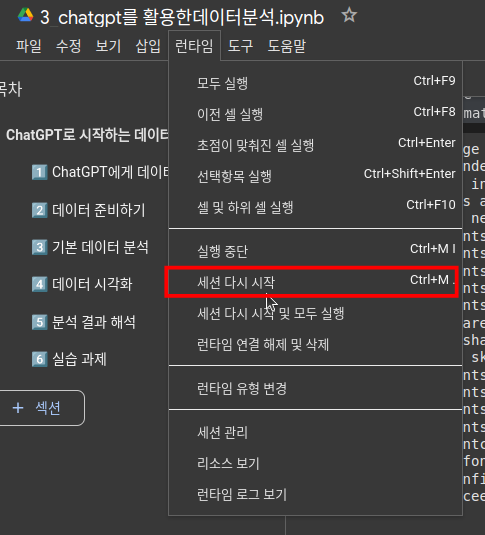

In [ ]:
# 한글 폰트 설정을 위한 패키지 설치
!pip install koreanize-matplotlib

# 나눔 폰트 설치
import koreanize_matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


## 3.ChatGPT에게 데이터 요청하기
[**예시** ](https://chatgpt.com/share/672e2018-f5c8-8002-988c-e1bff47ce005)

### 프롬프트 구성 가이드

아래 프롬프트 템플릿을 참고하여 원하는 데이터를 요청해보세요:



```너는 데이터 분석 전문가이고 나는 데이터 분석에 입문하는 고등학생입니다.
[분석하고 싶은 주제]를 분석하고 싶은데, 실습용 데이터가 필요합니다.
다음 조건에 맞는 데이터를 python colab에서 실행할수 있도록 만들어주세요:
1. 기간: [원하는 기간 입력 - 예: 1주일, 1개월]
2. 필요한 정보:
   - [첫 번째 열 이름]: [데이터 특징 설명]
   - [두 번째 열 이름]: [데이터 특징 설명]
   ...
3. 특이사항: [특별히 포함되었으면 하는 조건]
```
### 프롬프트 수정 예시

1. **학교 매점 데이터**


```너는 데이터 분석 전문가이고 나는 데이터 분석에 입문하는 고등학생입니다.
학교 매점 판매 데이터를 분석하고 싶은데, 실습용 데이터가 필요합니다.
다음 조건에 맞는 데이터를 python colab에서 실행할수 있도록 만들어주세요
1. 기간: 1주일
2. 필요한 정보:
   - 날짜
   - 품목(음료, 과자, 빵)
   - 판매량
   - 판매가격

```
2. **학생 성적 데이터**


```너는 데이터 분석 전문가이고 나는 데이터 분석에 입문하는 고등학생입니다.
학생 성적 데이터를 분석하고 싶은데, 실습용 데이터가 필요합니다.
다음 조건에 맞는 데이터를 python colab에서 실행할수 있도록 만들어주세요
1. 기간: 1학기
2. 필요한 정보:
   - 학생ID
   - 과목(국어, 영어, 수학)
   - 중간고사
   - 기말고사
   - 수행평가
```
3. **운동 기록 데이터**


```너는 데이터 분석 전문가이고 나는 데이터 분석에 입문하는 고등학생입니다.
운동 기록을 분석하고 싶은데, 실습용 데이터가 필요합니다.
다음 조건에 맞는 데이터를 python colab에서 실행할수 있도록 만들어주세요
1. 기간: 2주일
2. 필요한 정보:
   - 날짜
   - 운동종류
   - 운동시간
   - 소모칼로리
3. 특이사항: 주말에는 운동량이 더 많게 설정
```

### 프롬프트 수정 팁
1. **명확한 기간 설정**
   - 데이터의 시작과 끝 지정
   - 데이터 포인트 수 명시

2. **구체적인 데이터 항목**
   - 각 열의 의미 설명
   - 데이터 범위나 단위 지정

3. **특별한 조건 추가**
   - 특정 패턴 요청
   - 이상치 포함 여부
   - 계절성이나 주기성 요청

4. **현실적인 데이터 요청**
   - 실제 상황과 비슷한 범위 설정
   - 논리적으로 가능한 수치 사용

이제 예시 데이터로 분석을 시작해보겠습니다!

## 4.데이터 준비하기

ChatGPT가 제공한 학교 매점 데이터를 사용해보겠습니다.

In [ ]:
import pandas as pd

# 1주일간의 매점 판매 데이터 생성
data = {
    '날짜': [
        '2024-11-01', '2024-11-01', '2024-11-01',
        '2024-11-02', '2024-11-02', '2024-11-02',
        '2024-11-03', '2024-11-03', '2024-11-03',
        '2024-11-04', '2024-11-04', '2024-11-04',
        '2024-11-05', '2024-11-05', '2024-11-05',
        '2024-11-06', '2024-11-06', '2024-11-06',
        '2024-11-07', '2024-11-07', '2024-11-07',
    ],
    '품목': [
        '음료', '과자', '빵',
        '음료', '과자', '빵',
        '음료', '과자', '빵',
        '음료', '과자', '빵',
        '음료', '과자', '빵',
        '음료', '과자', '빵',
        '음료', '과자', '빵'
    ],
    '판매량': [
        30, 20, 15,
        25, 18, 12,
        35, 24, 10,
        40, 22, 14,
        28, 19, 13,
        30, 25, 11,
        33, 21, 12,
    ],
    '판매가격': [
        1000, 500, 1500,
        1000, 500, 1500,
        1000, 500, 1500,
        1000, 500, 1500,
        1000, 500, 1500,
        1000, 500, 1500,
        1000, 500, 1500
    ]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임 출력
df


,날짜,품목,판매량,판매가격
0,2024-11-01,음료,30,1000
1,2024-11-01,과자,20,500
2,2024-11-01,빵,15,1500
3,2024-11-02,음료,25,1000
4,2024-11-02,과자,18,500
5,2024-11-02,빵,12,1500
6,2024-11-03,음료,35,1000
7,2024-11-03,과자,24,500
8,2024-11-03,빵,10,1500
9,2024-11-04,음료,40,1000


## 5.기본 데이터 분석

ChatGPT에게 분석 방법을 물어보고, 제안받은 코드를 실행해봅시다.

기본 데이터 분석 요청 프롬프트 예시:
```
위 데이터로 할 수 있는 기본적인 분석을 알려주세요.
특히 판매량과 매출액을 중심으로 분석하고 싶습니다.
```

In [ ]:
# 날짜별 총 판매량과 매출액 계산
df['매출액'] = df['판매량'] * df['판매가격']
daily_summary = df.groupby('날짜')[['판매량', '매출액']].sum()
daily_summary


,판매량,매출액
날짜,,
2024-11-01,65,62500
2024-11-02,55,52000
2024-11-03,69,62000
2024-11-04,76,72000
2024-11-05,60,57000
2024-11-06,66,59000
2024-11-07,66,61500



## 6.데이터 시각화

ChatGPT에게 시각화 프롬프트 예시:
```
이 데이터를 시각화하는 좋은 방법을 알려주세요.
matplotlib과 seaborn을 사용해서 보기 좋은 그래프를 만들고 싶습니다.

```

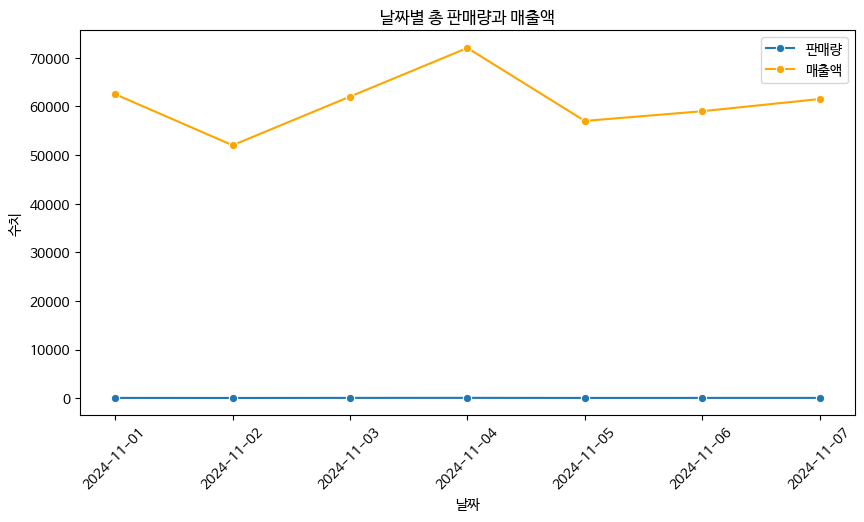

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 날짜별 총 판매량과 매출액 데이터
daily_summary = df.groupby('날짜')[['판매량', '매출액']].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_summary, x='날짜', y='판매량', marker='o', label='판매량')
sns.lineplot(data=daily_summary, x='날짜', y='매출액', marker='o', color='orange', label='매출액')
plt.title('날짜별 총 판매량과 매출액')
plt.xlabel('날짜')
plt.ylabel('수치')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## 7.분석 결과 해석

ChatGPT에게 분석 결과 해석을 요청해봅시다:
```
위 분석 결과를 해석하는 방법을 알려주세요.
특히 매출 트렌드와 품목별 특징을 중심으로 설명해주세요.
```